# 大作业：Red Wine Quality

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from minepy import MINE

In [3]:
path = './Red Wine Quality/winequality-red.csv'
train = pd.read_csv(path)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


1 - fixed acidity    
2 - volatile acidity    
3 - citric acid    
4 - residual sugar    
5 - chlorides   
6 - free sulfur dioxide   
7 - total sulfur dioxide  
8 - density  
9 - pH  
10 - sulphates  
11 - alcohol  
Output variable (based on sensory data):  
12 - quality (score between 0 and 10)  

In [4]:
train.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
items = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
         'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 
         'pH', 'sulphates', 'alcohol', 'quality']

In [8]:
index_list = []
non_noise = train
for i in range(len(items) - 1):
    data = train.iloc[:, i:i+1]
    s = data.describe()
    mean = s.loc['mean', items[i]]
    std = s.loc['std', items[i]]
    noise = data[(data[items[i]] < (mean - 3*std)) | (data[items[i]] > (mean + 3*std))]
    non_noise = non_noise[(non_noise[items[i]] > (mean - 3*std)) & (non_noise[items[i]] < (mean + 3*std))]
    noise_index = np.array(noise.index)
    nn_index = np.array(non_noise.index)
    print(len(nn_index))
    index_list.extend(noise_index)

1587
1577
1576
1547
1517
1503
1494
1485
1478
1463
1458


In [9]:
non_noise.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,8.312551,0.524050,0.265281,2.388717,0.081531,15.089849,43.660494,0.996718,3.316152,0.642414,10.417798,5.646776
std,1.647635,0.169451,0.191271,0.865307,0.021218,9.317669,29.414615,0.001718,0.141052,0.129753,1.021649,0.801119
min,5.000000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.991500,2.880000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995600,3.220000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,36.000000,0.996700,3.315000,0.620000,10.200000,6.000000
75%,9.200000,0.635000,0.420000,2.600000,0.089000,21.000000,58.000000,0.997800,3.400000,0.720000,11.100000,6.000000
max,13.500000,1.040000,0.790000,6.700000,0.226000,47.000000,145.000000,1.002200,3.750000,1.160000,13.600000,8.000000


## 可视化： 直方图、盒图

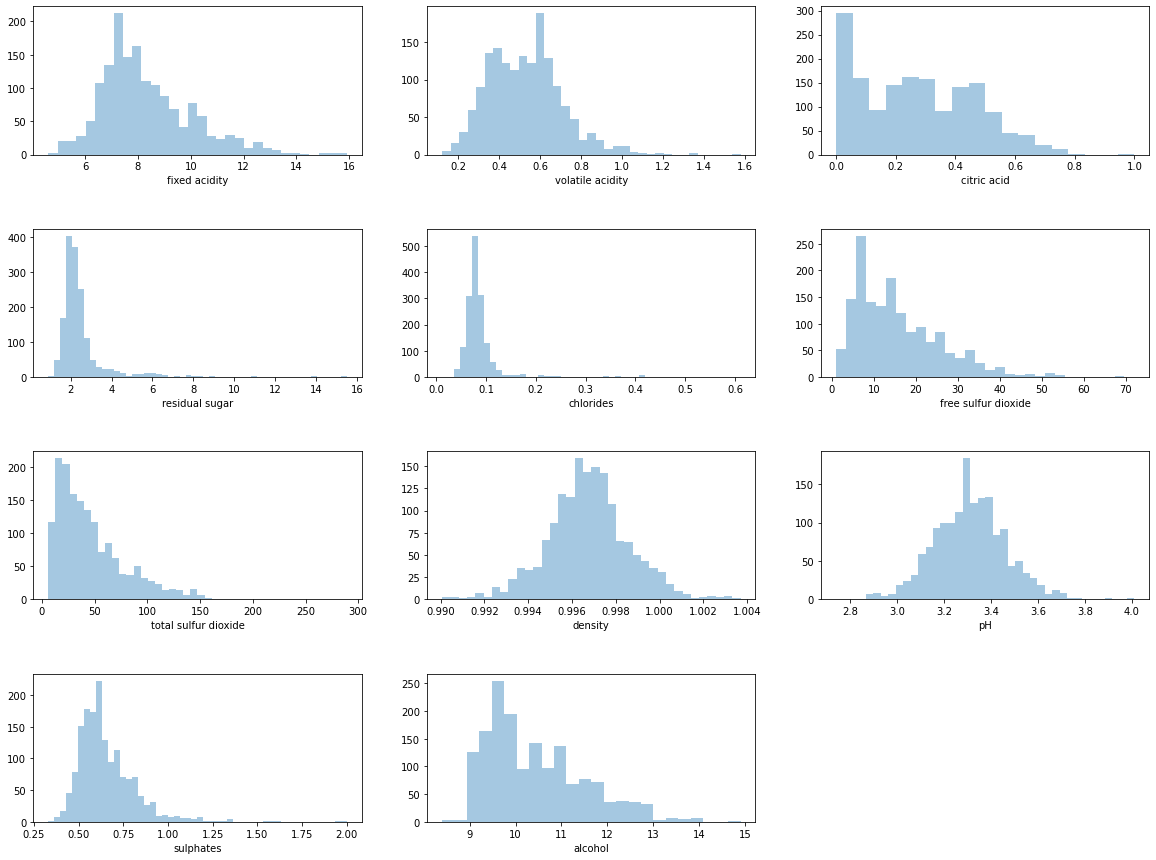

In [5]:
plt.figure(figsize=(20, 15))
for i in range(len(items) - 1):
    plt.subplot(4, 3, i+1)
    sns.distplot(train[items[i]], kde=False)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
plt.show()

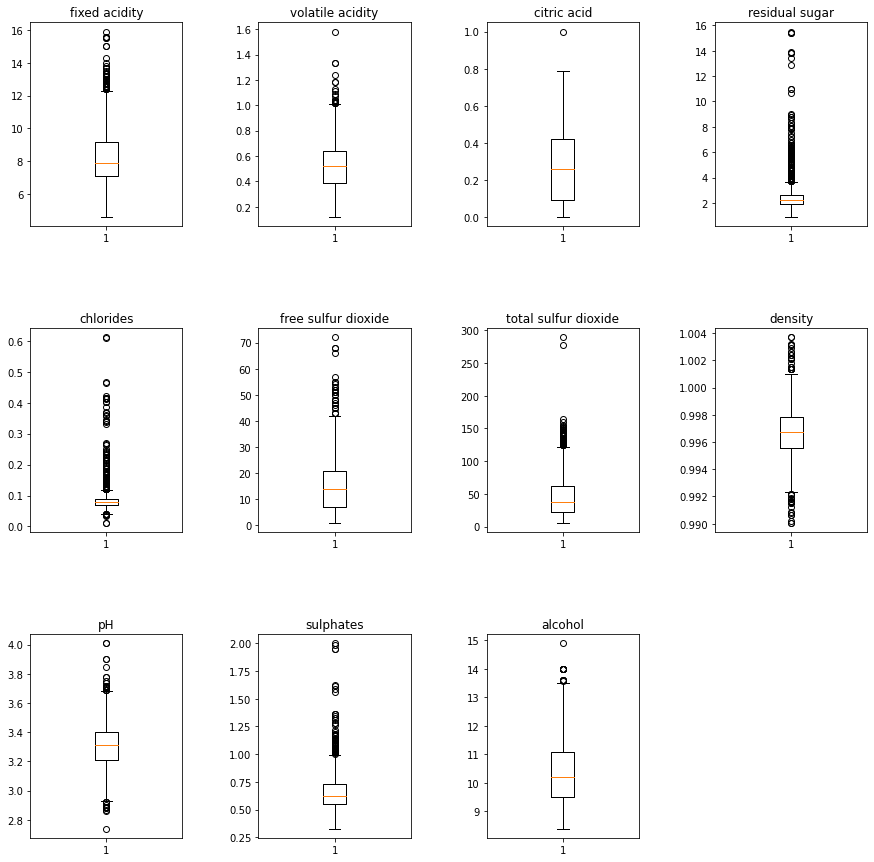

In [6]:
plt.figure(figsize=(15, 15))
for i in range(len(items) - 1):
    plt.subplot(3, 4, i+1)
    plt.boxplot(train[items[i]])
    plt.title(items[i])
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)
plt.show()

## 双变量分析

In [11]:
non_noise.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.296566,0.699747,0.175809,0.187853,-0.146702,-0.098843,0.660497,-0.704507,0.200796,-0.018384,0.135851
volatile acidity,-0.296566,1.000000,-0.589286,0.032331,0.070307,0.008824,0.104585,-0.000446,0.252900,-0.350547,-0.212767,-0.362783
citric acid,0.699747,-0.589286,1.000000,0.178784,0.104950,-0.072097,0.007320,0.372338,-0.521270,0.303401,0.164420,0.238244
residual sugar,0.175809,0.032331,0.178784,1.000000,0.121287,-0.005795,0.091381,0.343236,-0.072787,0.071218,0.162423,0.053999
chlorides,0.187853,0.070307,0.104950,0.121287,1.000000,-0.057342,0.040874,0.330104,-0.183105,0.025329,-0.209711,-0.120832
free sulfur dioxide,-0.146702,0.008824,-0.072097,-0.005795,-0.057342,1.000000,0.660348,-0.039334,0.107444,0.059713,-0.076400,-0.063786
total sulfur dioxide,-0.098843,0.104585,0.007320,0.091381,0.040874,0.660348,1.000000,0.116386,-0.007726,-0.037164,-0.257834,-0.222634
density,0.660497,-0.000446,0.372338,0.343236,0.330104,-0.039334,0.116386,1.000000,-0.311217,0.127562,-0.469611,-0.177758
pH,-0.704507,0.252900,-0.521270,-0.072787,-0.183105,0.107444,-0.007726,-0.311217,1.000000,-0.039558,0.136659,-0.084922
sulphates,0.200796,-0.350547,0.303401,0.071218,0.025329,0.059713,-0.037164,0.127562,-0.039558,1.000000,0.240684,0.379814


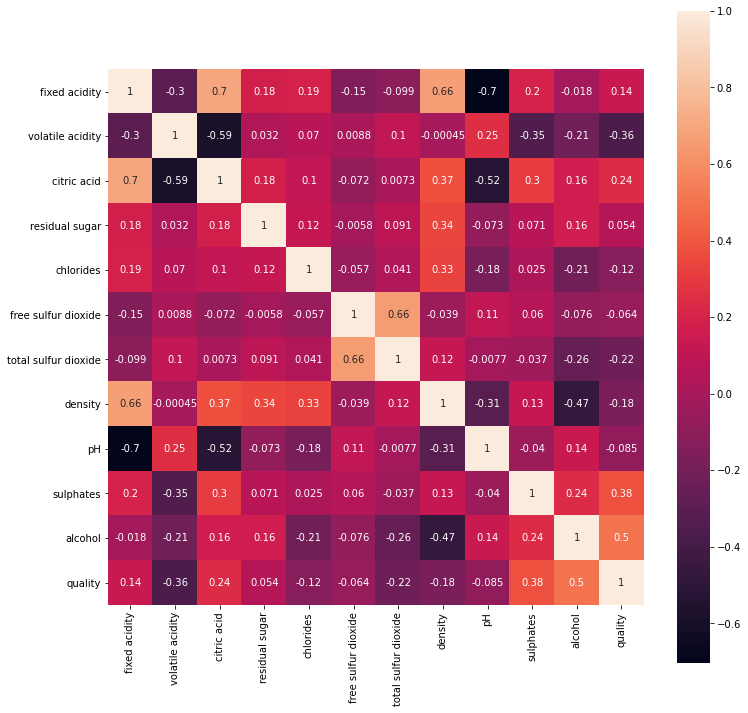

In [14]:
figure, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(non_noise.corr(), square=True, annot=True, ax=ax)

In [26]:
train.corr('kendall')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.185197,0.484271,0.155029,0.176043,-0.119301,-0.056879,0.457461,-0.527832,0.141343,-0.048870,0.087966
volatile acidity,-0.185197,1.000000,-0.428354,0.022407,0.109608,0.012573,0.063701,0.015913,0.158746,-0.228888,-0.151839,-0.300779
citric acid,0.484271,-0.428354,1.000000,0.123007,0.076729,-0.049804,0.011645,0.245729,-0.389752,0.226669,0.064004,0.167318
residual sugar,0.155029,0.022407,0.123007,1.000000,0.152415,0.052682,0.102265,0.295986,-0.063127,0.026959,0.081206,0.025744
chlorides,0.176043,0.109608,0.076729,0.152415,1.000000,0.000439,0.091610,0.287866,-0.162706,0.014227,-0.197176,-0.148919
free sulfur dioxide,-0.119301,0.012573,-0.049804,0.052682,0.000439,1.000000,0.606908,-0.028972,0.079300,0.031706,-0.056019,-0.045646
total sulfur dioxide,-0.056879,0.063701,0.011645,0.102265,0.091610,0.606908,1.000000,0.087719,-0.006798,-0.000194,-0.179212,-0.156612
density,0.457461,0.015913,0.245729,0.295986,0.287866,-0.028972,0.087719,1.000000,-0.217228,0.110191,-0.329754,-0.136611
pH,-0.527832,0.158746,-0.389752,-0.063127,-0.162706,0.079300,-0.006798,-0.217228,1.000000,-0.053568,0.125311,-0.034235
sulphates,0.141343,-0.228888,0.226669,0.026959,0.014227,0.031706,-0.000194,0.110191,-0.053568,1.000000,0.143745,0.299270


In [28]:
train.corr('spearman')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.278282,0.661708,0.220701,0.250904,-0.175137,-0.088417,0.623071,-0.706674,0.212654,-0.066576,0.114084
volatile acidity,-0.278282,1.000000,-0.610259,0.032386,0.158770,0.021163,0.094110,0.025014,0.233572,-0.325584,-0.224932,-0.380647
citric acid,0.661708,-0.610259,1.000000,0.176417,0.112577,-0.076452,0.009400,0.352285,-0.548026,0.331074,0.096456,0.213481
residual sugar,0.220701,0.032386,0.176417,1.000000,0.212959,0.074618,0.145375,0.422266,-0.089971,0.038332,0.116548,0.032048
chlorides,0.250904,0.158770,0.112577,0.212959,1.000000,0.000805,0.130033,0.411390,-0.234361,0.020825,-0.284504,-0.189922
free sulfur dioxide,-0.175137,0.021163,-0.076452,0.074618,0.000805,1.000000,0.789698,-0.041178,0.115679,0.045862,-0.081367,-0.056901
total sulfur dioxide,-0.088417,0.094110,0.009400,0.145375,0.130033,0.789698,1.000000,0.129332,-0.009841,-0.000504,-0.257806,-0.196735
density,0.623071,0.025014,0.352285,0.422266,0.411390,-0.041178,0.129332,1.000000,-0.312055,0.161478,-0.462445,-0.177074
pH,-0.706674,0.233572,-0.548026,-0.089971,-0.234361,0.115679,-0.009841,-0.312055,1.000000,-0.080306,0.179932,-0.043672
sulphates,0.212654,-0.325584,0.331074,0.038332,0.020825,0.045862,-0.000504,0.161478,-0.080306,1.000000,0.207330,0.377060


In [55]:
list_similarity = []
mine = MINE(alpha=0.6, c=15)
for i in range(len(items)):
    mine.compute_score(train[items[i]], train[items[len(items) - 1]])
    list_similarity.append(mine.mic())
print(pd.DataFrame(list_similarity, columns=['quality'], index=items))

                       quality
fixed acidity         0.069389
volatile acidity      0.147521
citric acid           0.084114
residual sugar        0.063269
chlorides             0.091436
free sulfur dioxide   0.042377
total sulfur dioxide  0.131426
density               0.136607
pH                    0.046885
sulphates             0.150187
alcohol               0.210051
quality               0.996521


相关性最高：citric acid，sulphates，alcohol